In [1]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install customized_konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [990 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,185 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [915 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,015 kB]
Get:13 http://security.ubuntu.com/ubunt

In [2]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import re
from ckonlpy.tag import Twitter

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

okt = Twitter()

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [3]:
okt.pos('우리아이오아이는 정말 이뻐요')

[('우리', 'Noun'),
 ('아이오', 'Noun'),
 ('아', 'Josa'),
 ('이는', 'Verb'),
 ('정말', 'Noun'),
 ('이뻐요', 'Adjective')]

In [4]:
okt.add_dictionary('아이오아이', 'Noun')

In [5]:
okt.pos('우리아이오아이는 정말 이뻐요')

[('우리', 'Noun'),
 ('아이오아이', 'Noun'),
 ('는', 'Josa'),
 ('정말', 'Noun'),
 ('이뻐요', 'Adjective')]

In [6]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt",
                           filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt",
                           filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7aed21811990>)

In [7]:
train_data = pd.read_table('ratings_train.txt', encoding = 'utf-8')
test_data = pd.read_table('ratings_test.txt', encoding = 'utf-8')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [10]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [11]:
# 중복 제거를 위한 중복 체크
# 유니크한 value의 개수를 나타냄
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [12]:
test_data['document'].nunique(), test_data['label'].nunique()

(49157, 2)

In [13]:
train_data.drop_duplicates(subset = ['document'],
                           inplace = True) # document 열에서 중복인 내용이 있다면 중복 제거

In [14]:
test_data.drop_duplicates(subset = ['document'],
                           inplace = True) # document 열에서 중복인 내용이 있다면 중복 제거

<Axes: >

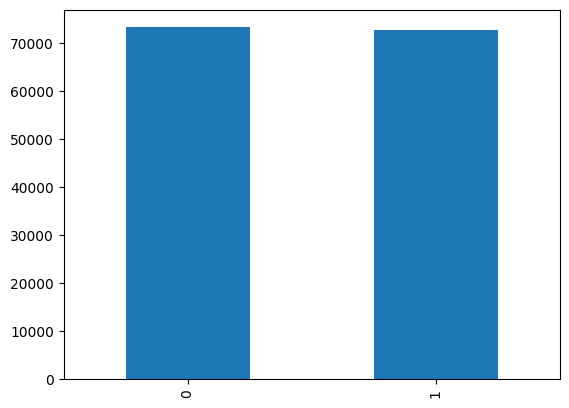

In [15]:
train_data['label'].value_counts().plot(kind = 'bar')

<Axes: >

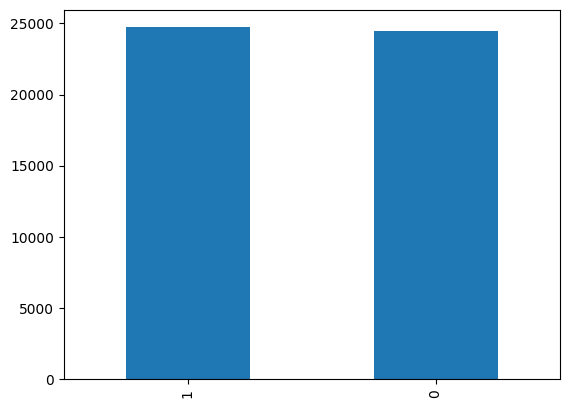

In [16]:
test_data['label'].value_counts().plot(kind = 'bar')

In [17]:
train_data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [18]:
test_data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [19]:
print(train_data.loc[train_data['document'].isnull()])
print(test_data.loc[test_data['document'].isnull()])

            id document  label
25857  2172111      NaN      1
          id document  label
5746  402110      NaN      1


In [20]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print('학습용: ', train_data.isnull().values.any())

학습용:  False


In [21]:
test_data = test_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print('학습용: ', test_data.isnull().values.any())

학습용:  False


In [22]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [23]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')
train_data['document']

<ipython-input-23-46a8e63291ca>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')


0                                             아더빙진짜짜증나네요목소리
1                                   흠포스터보고초딩영화줄오버연기조차가볍지않구나
2                                         너무재밓었다그래서보는것을추천한다
3                                      교도소이야기구먼솔직히재미는없다평점조정
4         사이몬페그의익살스런연기가돋보였던영화스파이더맨에서늙어보이기만했던커스틴던스트가너무나도이...
                                ...                        
149995                                         인간이문제지소는뭔죄인가
149996                                             평점이너무낮아서
149997                              이게뭐요한국인은거들먹거리고필리핀혼혈은착하다
149998                                청춘영화의최고봉방황과우울했던날들의자화상
149999                                   한국영화최초로수간하는내용이담긴영화
Name: document, Length: 146182, dtype: object

In [24]:
test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')
test_data['document']

<ipython-input-24-90fa9252def6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')


0                                       굳ㅋ
1                                         
2                 뭐야이평점들은나쁘진않지만점짜리는더더욱아니잖아
3                     지루하지는않은데완전막장임돈주고보기에는
4            만아니었어도별다섯개줬을텐데왜로나와서제심기를불편하게하죠
                       ...                
49995    오랜만에평점로긴했네ㅋㅋ킹왕짱쌈뽕한영화를만났습니다강렬하게육쾌함
49996       의지박약들이나하는거다탈영은일단주인공김대희닮았고이등병찐따
49997             그림도좋고완성도도높았지만보는내내불안하게만든다
49998       절대봐서는안될영화재미도없고기분만잡치고한세트장에서다해먹네
49999                             마무리는또왜이래
Name: document, Length: 49157, dtype: object

In [25]:
from google.colab import files
myfile = files.upload()

Saving korean_stopword.csv to korean_stopword.csv


In [26]:
k_stopword = pd.read_csv('/content/korean_stopword.csv')
k_stopword.head()

,불용어
0,이
1,있
2,하
3,것
4,들


In [27]:
stopword = list(k_stopword['불용어']) + ['을', '은', '를', '이가', '과', '의', '는', '에']
stopword[:10]

['이', '있', '하', '것', '들', '그', '되', '수', '이', '보']

In [28]:
from tqdm.notebook import tqdm

X_train = []
for i in tqdm(train_data.index):
  morph = okt.morphs(train_data.loc[i]['document'])
  temp_X = []
  for txt in morph:
    if txt not in stopword:
      temp_X.append(txt)
  X_train.append(temp_X)
X_train[:5]

  0%|          | 0/146182 [00:00<?, ?it/s]

[['아더', '빙', '진짜', '짜증', '네요', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차가', '볍지않', '구나'],
 ['너', '무재', '밓었', '다그', '래서', '보는것을', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직', '히', '재미', '없다', '평점', '조정'],
 ['사이',
  '몬페그',
  '익살',
  '스런',
  '연기',
  '돋보였던',
  '영화',
  '스파이더맨',
  '에서',
  '늙',
  '어보',
  '이기만',
  '했던커스틴던스트',
  '너무나도',
  '이뻐',
  '보였다']]

In [29]:
test_data.head()

,id,document,label
0,6270596,굳ㅋ,1
1,9274899,,0
2,8544678,뭐야이평점들은나쁘진않지만점짜리는더더욱아니잖아,0
3,6825595,지루하지는않은데완전막장임돈주고보기에는,0
4,6723715,만아니었어도별다섯개줬을텐데왜로나와서제심기를불편하게하죠,0


In [30]:
# 빈 샘플 제거
drop_train = []
for index, sentence in enumerate(X_train):
  if len(sentence) < 1:
    drop_train.append(index)
drop_train[:3]

[159, 404, 412]

In [31]:
X_train[159]

[]

In [32]:
y_train = np.array(train_data['label'])
y_train[:6]

array([0, 1, 0, 0, 1, 0])

In [33]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

145325
145325


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [34]:
from tqdm.notebook import tqdm

X_test = []
for i in tqdm(test_data.index):
  morph = okt.morphs(test_data.loc[i]['document'])
  temp_X = []
  for txt in morph:
    if txt not in stopword:
      temp_X.append(txt)
  X_test.append(temp_X)
X_test[:5]

  0%|          | 0/49157 [00:00<?, ?it/s]

[['굳', 'ㅋ'],
 [],
 ['뭐', '야', '이평', '나쁘진', '않지', '만점', '짜', '더욱', '아', '니', '잖아'],
 ['루하', '지는', '않은데', '완전', '막장', '임돈', '주고', '보기', '에는'],
 ['만', '었', '어도', '별', '다섯', '줬을텐데', '왜', '로나', '서', '심기', '불편', '하게하죠']]

In [35]:
# 빈 샘플 제거
drop_test = []
for index, sentence in enumerate(X_test):
  if len(sentence) < 1:
    drop_test.append(index)
drop_test[:3]

[1, 116, 254]

In [36]:
X_test[1]

[]

In [40]:
y_test = np.array(test_data['label'])
y_test[:6]

array([1, 0, 0, 0, 0, 1])

In [41]:
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))

48824
48824


In [42]:
X_test[0:5]

array([list(['굳', 'ㅋ']),
       list(['뭐', '야', '이평', '나쁘진', '않지', '만점', '짜', '더욱', '아', '니', '잖아']),
       list(['루하', '지는', '않은데', '완전', '막장', '임돈', '주고', '보기', '에는']),
       list(['만', '었', '어도', '별', '다섯', '줬을텐데', '왜', '로나', '서', '심기', '불편', '하게하죠']),
       list(['음악', '이주', '된', '최', '고의', '음악', '영화'])], dtype=object)

In [43]:
y_test[0:5]

array([1, 0, 0, 0, 1])

In [44]:
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'영화': 1, '다': 2, '재미': 3, '아': 4, '만': 5, '정말': 6, '게': 7, '진짜': 8, '하고': 9, '너무': 10, '으로': 11, '지만': 12, '에서': 13, '보고': 14, '평점': 15, '인': 16, '이다': 17, '니': 18, '화': 19, '이영화': 20, '연기': 21, '스토리': 22, '네': 23, '드라마': 24, '감동': 25, 'ㅋㅋ': 26, '최고': 27, '너': 28, '배우': 29, '못': 30, '없는': 31, '서': 32, '그냥': 33, '왜': 34, '감독': 35, '내용': 36, '보다': 37, '히': 38, '없다': 39, '쓰레기': 40, '라': 41, '뭐': 42, '하는': 43, '작품': 44, '면서': 45, '봤는데': 46, '마지막': 47, '함': 48, 'ㅠㅠ': 49, '해서': 50, '완전': 51, '할': 52, 'ㅋㅋㅋ': 53, '한영': 54, 'ㅋ': 55, '사랑': 56, '주인공': 57, '보는': 58, '은영': 59, '느낌': 60, '액션': 61, '입니다': 62, '볼': 63, '야': 64, '랑': 65, '난': 66, '영': 67, 'ㅡㅡ': 68, '이야기': 69, '기': 70, '처음': 71, '여': 72, '끝': 73, '본': 74, '장면': 75, '깝': 76, '이건': 77, '같은': 78, '라고': 79, '봤': 80, '명작': 81, '그리': 82, '이아': 83, '최': 84, '별로': 85, '있는': 86, '돈': 87, '지루': 88, '역시': 89, '임': 90, '냐': 91, '봐도': 92, '된': 93, '들이': 94, '좋은': 95, '최악': 96, '듯': 97, '분': 98, '지는': 99, '기억': 100, '참': 101, '든': 102, '다그': 103, '부

In [45]:
len(tokenizer.word_index)

97250

In [46]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  # 단어의 등장 빈도수가 threshold보다 작으면
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

In [47]:
print('단어 집한(vocabulary)의 크기: ', total_cnt)
print('등장 빈도가 %s번 이하인 회귀 단어의 수: %s' %(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율: ', (rare_cnt / total_cnt) * 100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율: ', (rare_freq / total_freq) * 100)

단어 집한(vocabulary)의 크기:  97250
등장 빈도가 2번 이하인 회귀 단어의 수: 65377
단어 집합에서 희귀 단어의 비율:  67.22570694087405
전체 등장 빈도에서 희귀 단어 등장 빈도 비율:  4.900795101789672


In [48]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거
# 0번 패딩 토큰과 1번 oov 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기:', vocab_size)

단어 집합의 크기: 31875


In [49]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train[:3]

[[8205, 9638, 9, 127, 1492, 666],
 [1190, 441, 15, 623, 2, 271, 1844, 22, 1, 10087, 212],
 [29, 144, 1, 104, 425, 12616, 185, 3]]

In [50]:
print(tokenizer.word_index)

{'OOV': 1, '영화': 2, '다': 3, '재미': 4, '아': 5, '만': 6, '정말': 7, '게': 8, '진짜': 9, '하고': 10, '너무': 11, '으로': 12, '지만': 13, '에서': 14, '보고': 15, '평점': 16, '인': 17, '이다': 18, '니': 19, '화': 20, '이영화': 21, '연기': 22, '스토리': 23, '네': 24, '드라마': 25, '감동': 26, 'ㅋㅋ': 27, '최고': 28, '너': 29, '배우': 30, '못': 31, '없는': 32, '서': 33, '그냥': 34, '왜': 35, '감독': 36, '내용': 37, '보다': 38, '히': 39, '없다': 40, '쓰레기': 41, '라': 42, '뭐': 43, '하는': 44, '작품': 45, '면서': 46, '봤는데': 47, '마지막': 48, '함': 49, 'ㅠㅠ': 50, '해서': 51, '완전': 52, '할': 53, 'ㅋㅋㅋ': 54, '한영': 55, 'ㅋ': 56, '사랑': 57, '주인공': 58, '보는': 59, '은영': 60, '느낌': 61, '액션': 62, '입니다': 63, '볼': 64, '야': 65, '랑': 66, '난': 67, '영': 68, 'ㅡㅡ': 69, '이야기': 70, '기': 71, '처음': 72, '여': 73, '끝': 74, '본': 75, '장면': 76, '깝': 77, '이건': 78, '같은': 79, '라고': 80, '봤': 81, '명작': 82, '그리': 83, '이아': 84, '최': 85, '별로': 86, '있는': 87, '돈': 88, '지루': 89, '역시': 90, '임': 91, '냐': 92, '봐도': 93, '된': 94, '들이': 95, '좋은': 96, '최악': 97, '듯': 98, '분': 99, '지는': 100, '기억': 101, '참': 102, '든': 103, '

In [51]:
print('리뷰의 평균 길이: ', sum(map(len, X_train)) / len(X_train))

리뷰의 평균 길이:  10.91492860829176


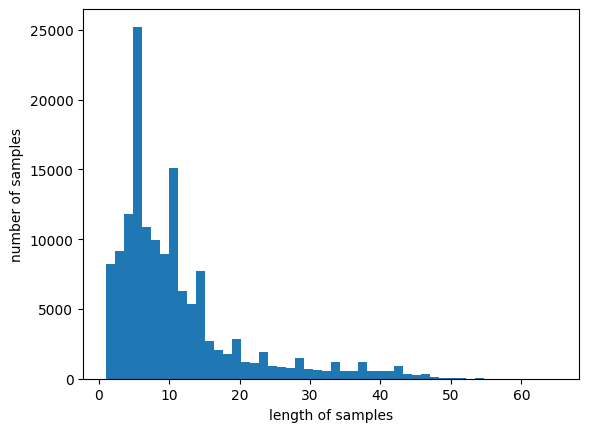

In [52]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [53]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
      cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s' %(max_len, (cnt / len(nested_list)) * 100))

In [54]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen = 30)
X_train[:3]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,  8205,  9638,     9,
          127,  1492,   666],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,  1190,   441,    15,   623,     2,   271,  1844,    22,
            1, 10087,   212],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,    29,   144,     1,   104,   425,
        12616,   185,     3]], dtype=int32)

In [55]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = 30)
X_test.shape

(48824, 30)

In [56]:
vocab_size

31875

In [57]:
# RNN
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [58]:
model_RNN = Sequential()
model_RNN.add(Embedding(input_dim = vocab_size, output_dim = 128))
model_RNN.add(SimpleRNN(128, return_sequences=True))
model_RNN.add(SimpleRNN(64, return_sequences=False))
model_RNN.add(Dense(32, activation = 'relu'))
model_RNN.add(Dense(1, activation = 'sigmoid'))

In [59]:
model_RNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model_RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         4080000   
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 128)         32896     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,127,361
Trainable params: 4,127,361
Non-trainable params: 0
_________________________________________________________________


In [60]:
# 검증 데이터 손실(val_loss)이 증가하면,
# 과적합 징후므로 검증 데이터 손실이 4회 증가하면 학습을 조기 종료(Early Stopping)합니다.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_RNN.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)

In [61]:
history = model_RNN.fit(X_train, y_train, epochs=10, callbacks=[es, mc],
                        batch_size=60, validation_split = 0.2)

Epoch 1/10
1938/1938 [==============================] - ETA: 0s - loss: 0.4869 - acc: 0.7537
Epoch 1: val_acc improved from -inf to 0.82340, saving model to best_model_RNN.h5
1938/1938 [==============================] - 194s 95ms/step - loss: 0.4869 - acc: 0.7537 - val_loss: 0.4009 - val_acc: 0.8234
Epoch 2/10
1938/1938 [==============================] - ETA: 0s - loss: 0.3509 - acc: 0.8489
Epoch 2: val_acc improved from 0.82340 to 0.82894, saving model to best_model_RNN.h5
1938/1938 [==============================] - 142s 73ms/step - loss: 0.3509 - acc: 0.8489 - val_loss: 0.3846 - val_acc: 0.8289
Epoch 3/10
1938/1938 [==============================] - ETA: 0s - loss: 0.2830 - acc: 0.8852
Epoch 3: val_acc improved from 0.82894 to 0.82952, saving model to best_model_RNN.h5
1938/1938 [==============================] - 141s 73ms/step - loss: 0.2830 - acc: 0.8852 - val_loss: 0.4057 - val_acc: 0.8295
Epoch 4/10
1938/1938 [==============================] - ETA: 0s - loss: 0.2231 - acc: 0.914

In [68]:
from tensorflow.keras.models import load_model

loaded_model_RNN = load_model('best_model_RNN.h5')

In [62]:
new_sentence = '이게 영화냐 내가 발로만들어도 더 잘만들겠다.'
new_sentence = okt.morphs(new_sentence) # 토큰화
new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
new_sentence

['게', '영화', '냐', '발', '로만', '어도', '잘만', '들겠다', '.']

In [63]:
encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
encoded

[[8, 2, 92, 654, 528, 286, 196, 5046, 1]]

In [65]:
max_len = 30
pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
pad_new

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    8,
           2,   92,  654,  528,  286,  196, 5046,    1]], dtype=int32)

In [69]:
score = float(loaded_model_RNN.predict(pad_new)) # 예측
score

1/1 [==============================] - 0s 397ms/step


0.03708507865667343

In [71]:
from tensorflow.keras.models import load_model
loaded_model_RNN = load_model('best_model_RNN.h5')
def sentiment_predict_RNN(new_sentence):
  new_sentence = okt.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model_RNN.predict(pad_new)) # 예측
  if (score > 0.5):
    print('{:.2f}% 확률로 긍정 리뷰입니다. \n'.format(score * 100))
  else:
    print('{:.2f}% 확률로 부정 리뷰입니다. \n'.format((1- score) * 100))

In [72]:
sentiment_predict_RNN('이게 영화냐 발로 만들어도 더 재미있겠다')

1/1 [==============================] - 0s 238ms/step
96.98% 확률로 부정 리뷰입니다. 

